# BM 336027 - Technion - Medical Image Processing


## Homework 5 - Image compression or image blending.
---

### <a style='color:red'> Due Date: 03.07.2022 </a>



---

### Agenda

* [Exercise 1: Huffman coding](#Exercise-1)
* [Exercise 2: Image blending](#Exercise-2)


#### Use as many cells as you need

### Submission Guidelines
---
* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw5_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).

In [1]:
# imports you will need
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import camera
from typing import Tuple, List, Iterable
from skimage.filters import gaussian
from skimage.transform import resize
%matplotlib inline

---

### **Assignment Instructions**
**In this assignment, you are allowed to use the imported functions, basic numpy its sub modules functions, matplotlib functions, and functions you implemented in other sections of the exercises (unless otherwise instructed)**

---

###  Exercise 1




In this exercise, you will Implement the Huffman coding for image compression.<br>
For the simplification, we will flatten a given image and assume that the shape of the image is known. 

1. Implement the function `symbol_prob` that receives a flattened image and returns a dictionary of symbols (key) and their probability (value).
Write a description of your function and explain its inputs and output.

In [2]:
def symbol_prob(img: np.ndarray) -> dict:
    '''
    The function receives a flattened image and returns a dictionary of symbols and their probability.
    
    :param img: numpy array of a flattened image
    :return dict_probs: dictionary of symbols (keys) and their probability (values)
    '''
    # ====== YOUR CODE: ======
    img_unique = np.unique(img)
    all_count = len(img)
    dict_probs = {}
    
    for value in img_unique:
        value_count = np.count_nonzero(img==value)
        prob_value = value_count/all_count
        dict_probs[value] = prob_value
            
    # ========================     
    return dict_probs


2. Implement the function `bulid_tree` that receives a dictionary of the symbols and their probabilities and returns a nested list of the image values representing the huffman tree. For example, given the dictionary: {0: 0.2, 1: 0.1, 2: 0.1, 3: 0.4, 4: 0.2} the tree should be [[0, 4], [[1, 2], 3]]. Write a description of your function and explain its inputs and output.

In [3]:
def bulid_tree(dict_prob: dict) -> list:
    '''
    The function receives a dictionary of symbols and their probabilities and returns an huffman tree.
    
    :param dict_prob: dictionary of symbols and their probabilities
    :return tree: nested list of the image values representing the huffman tree
    '''
    # ====== YOUR CODE: ======
    values = list(dict_prob.values())
    keys = list(dict_prob.keys())
    
    while len(values)>1:
        sorted_args = np.argsort(values)        
        arg1 = sorted_args[0]
        arg2 = sorted_args[1]
        
        key1 = keys[arg1]
        key2 = keys[arg2]
        
        node = [key1, key2]
        node_prob = values[arg1]+values[arg2]
        
        min_arg = min(arg1, arg2)
        max_arg = max(arg1, arg2)

        del values[min_arg]
        del values[max_arg-1]
        del keys[min_arg]
        del keys[max_arg-1]
            
        values.append(node_prob)
        keys.append(node)
        
    tree = node
    
    # ========================  
    return tree

3. Implement the function `huffman code` that receives the huffman tree and returns a dictionary of the symbols and their huffman coding (a binary string). <br> If needed, you may add an additional input to the function. 

    Optional guide: Assign an empty string to the root and then recursively assign 1 for the right branch and  0 for the left branch.<br>
    
    Write a description of your function and explain its inputs and output.

In [4]:
def huffman_code(huffman_tree: list, code='') -> dict:
    '''
    The function receives an huffman tree and returns a dictionary of the symbols and their huffman coding.
    
    :param huffman_tree: nested list of the image values representing the huffman tree
    :return dict_code: dictionary of the symbols and their huffman coding
    '''
    # ====== YOUR CODE: ======
    if type(huffman_tree) != list:
        return {huffman_tree: code}
    
    dict_code = {}
    dict_code.update(huffman_code(huffman_tree[0], code+'0'))
    dict_code.update(huffman_code(huffman_tree[1], code+'1'))
    
    # ========================         
    return dict_code

4. Implement the function `huffman_encode` that receives the huffman code and the flatten image and returns the encoded image. 
 Write a description of your function and explain its inputs and output.

In [5]:
def huffman_encode(code: dict, img: np.ndarray) -> list: 
    '''
    The function receives an huffman code and a flatten image and returns the encoded image.
    
    :param code: dictionary of the symbols and their huffman coding
    :params img: numpy array of a flattened image
    :return encoded_img: encoded image by huffman coding
    '''
    # ====== YOUR CODE: ======
    encoded_img = []
    
    for i, cell in enumerate(img):
        encoded_img.append(code[cell])
    # ========================     
    return encoded_img

5. Let's compress an image using your huffman coding.
Load the image camera of skimage (that was imported earlier) and flatten it.
Encode the flattened image using your functions.  

In [6]:
# ====== YOUR CODE: ======
img = camera()
img_flatten = img.flatten()

symbols_prob = symbol_prob(img_flatten)
tree = bulid_tree(symbols_prob)
code = huffman_code(tree)
encoded_img = huffman_encode(code, img_flatten)
# ========================

6. Now when we have the encoded image we would like to decode it. 
Implement the function `huffman_decode` that receives the encoded image and the huffman tree of the image and returns the decoded image.
Write a description of your function and explain its inputs and output.

In [7]:
def huffman_decode(encoded_img: list, tree: list) -> np.array: 
    '''
    The function receives an encoded image and the huffman tree of the image and returns the decoded image.
    
    :param encoded_img: encoded image by huffman coding
    :params tree: nested list of the image values representing the huffman tree
    :return decoded_img: flatten numpy array of the decoded image
    '''
    # ====== YOUR CODE: ======
    code = huffman_code(tree)
    inv_code = {value: key for key, value in code.items()}
    decoded_img = []
    
    for i, cell in enumerate(encoded_img):
        decoded_img.append(inv_code[cell])
        
    decoded_img = np.array(decoded_img)
    # ========================
    return decoded_img

7. Decode the encoded image using the above function. 
Display in one figure the original image and the decoded image, add titles. 


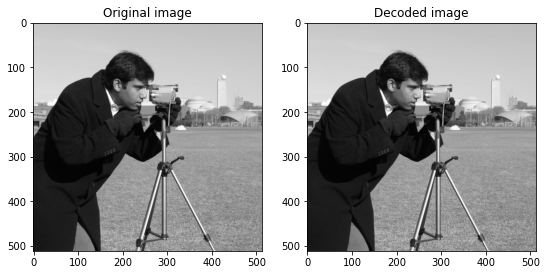

In [8]:
# ====== YOUR CODE: ======
decodes_img = huffman_decode(encoded_img, tree)
decodes_img = decodes_img.reshape(img.shape)

plt.figure(figsize=(9,9))

plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Original image')

plt.subplot(122)
plt.imshow(decodes_img, 'gray')
plt.title('Decoded image')

plt.show()
# ========================

8.   Compute the entropy of the image you were asked to encode.    
Did compression rate (bits/pixel) of the encoded image reach the theoretical bound set by the entropy (counting only the bits required to encode the pixel values)?     
If not, why?     
What condition is required for reaching the theoretical bound?

**Answer:**

In [9]:
entropy_orig = -np.sum([prob*np.log2(prob) for prob in symbols_prob.values()])
avg_len_encoded = np.mean([len(key_code) for key_code in encoded_img])
compression_ratio = 8/avg_len_encoded

print('The entropy of the image:', np.round(entropy_orig, 3))
print('The compression ratio:', np.round(compression_ratio, 3))
print(f'Bits per pixel (bpp): {np.round(avg_len_encoded, 3)}')

The entropy of the image: 7.232
The compression ratio: 1.102
Bits per pixel (bpp): 7.262


The bpp of the encoded image didn't reach the theoretical bound (8 bpp). We can also see that the compression ratio is bigger than 1, so we can assume that the compression went well.<br>
The condition that is required for reaching the theoretical bound is the image needs to be uniform distributed.

###  Exercise 2 

In this exercise, you will implement and use an algorithm base on Laplacian pyramids used to stitch multiple images together. 

1. First, implement the `gaussian_pyramid`  function that creates a list of downscaled versions of the input image by a scale of 2. Before each down sampling, use gaussian smoothing to avoid aliasing.

    Note: The smoothing is required to avoid aliasing. Do not smooth the mask so that it will remain a binary mask.

    Do not use the resize functions for downscaling. You may use the 'gaussian' function from skimage.filters
    
    Write a description of your function and explain its inputs and output.

In [10]:
def gaussian_pyramid(
        img: np.ndarray,
        num_levels: int,
        mask: bool = False,
        sigma: float = 0.4,
    ) -> list:
    '''
    The function creates a gaussian pyramid for an image or masked image (if a mask is given).
    
    :param img: numpy array of an image
    :params num_levels: number of downscaled versions (levels in the pyramid)
    :params mask: binary mask
    :params sigma: standard deviation for gaussian kernel
    :return gaussian_pyr: a list of downscaled versions of the input image by a scale of 2
    '''
    # ====== YOUR CODE: ======
    level_img = img.copy()
    gaussian_pyr = []
    
    for level in range(num_levels):
        row, col, channels = level_img.shape
        gaussian_pyr.append(level_img)
        
        # next level prep
        if not mask:
            level_img_smoothed = gaussian(level_img, sigma, multichannel=False)
        else:
            level_img_smoothed = level_img
        
        next_level_img = np.zeros([int(row/2), int(col/2), channels])
        next_level_img = level_img_smoothed[::2, ::2]
        level_img = np.array(next_level_img)
    
    gaussian_pyr = list(np.flip(gaussian_pyr, axis=0)) # flip the pyramid: first level (0) is the top of the pyrmid - low res
    # ========================
    return gaussian_pyr
        


2. Implement the `laplacian_pyramid` function that receives a Gaussian pyramid and computes an approximation of the Laplacian using the difference of Gaussians in every two consecutive levels of the pyramid. The top of the pyramid (lowest resolution) will remain the same.

    You may use the 'resize' function from skimage.transform

    Write a description of your function and explain its inputs and output.
    
    **Bonus (5 points):**   
Instead of using the 'resize' function from skimage, use your image transformation functions from homework assignments 3. Only instead of rotation, perform scaling.

In [11]:
def laplacian_pyramid(gaussian_pyr: list) -> list:
    '''
    The function receives a gaussian pyramid and computes the laplacian pyramid.
    
    :param gaussian_pyr: a list of downscaled versions of the input image by a scale of 2
    :return laplacian_pyr: a list of the difference of gaussians in every two consecutive levels
    '''
    # ====== YOUR CODE: ======
    laplacian_pyr = [gaussian_pyr[0]]
    
    for i in range(1, len(gaussian_pyr)):
        img_arr_present = gaussian_pyr[i]
        img_arr_to_expand = gaussian_pyr[i-1]
        
        row, col, channels = img_arr_present.shape
        resized_img = resize(img_arr_to_expand, output_shape=(row, col))
        
        diff = img_arr_present - resized_img
        laplacian_pyr.append(diff)
    # ======================== 
    return laplacian_pyr

3. Implement the `blend` function that receives 3 Laplacian pyramids, those of the two images you want to stitch together and that of the mask, and blend the two pyramids according to the mask. At each level of resolution, the combined pyramid will contain the pixels in the mask (ones) from the first pyramid and the pixels from out of the mask (zeros) from the second pyramid.

    Write a description of your function and explain its inputs and output.

In [12]:
def blend(laplacian_A: list, laplacian_B: list, mask_pyr: list) -> list:
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param laplacian_A: first laplacian pyramid of an image (will contain the pixels in the mask)
    :params laplacian_B: second laplacian pyramid of an image (will contain the pixels out of the mask)
    :params mask_pyr: laplacian pyramid of a mask
    :return blended_imgs: the blended laplacian pyramid according the mask
    '''
    # ====== YOUR CODE: ======
    blended_imgs = []
    
    for i in range(len(laplacian_A)):
        img_A = laplacian_A[i]
        img_B = laplacian_B[i]
        mask = mask_pyr[i]
        
        inverse_mask = np.zeros_like(mask_pyr[i])
        inverse_mask[mask_pyr[i]==0] = 1
        
        blended_imgs_iter = np.zeros_like(img_A)

        masked_A = mask*img_A
        masked_B = inverse_mask*img_B
        blended_imgs_iter = masked_A+masked_B
        
        blended_imgs.append(blended_imgs_iter)
    # ========================  
    return blended_imgs

4. Implement the `reconstruct` function that receives a Laplacian pyramid and reconstructs the Gaussian pyramid that was used to construct it by upscaling the top of the pyramid (lowest resolution) and adding it to the next layer and doing the same with the first reconstructed level to reconstruct the next layer and so on for all layers.

     You may use the 'resize' function from skimage.transform
     
     Write a description of your function and explain its inputs and output.
  

In [13]:
def reconstruct(laplacian_pyr: list,) -> list:
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param laplacian_pyr: 
    :return recon_pyr:
    '''
    # ====== YOUR CODE: ======
    recon_pyr = [laplacian_pyr[0]]
    
    for i in range(1, len(laplacian_pyr)):
        img_arr_present = laplacian_pyr[i]
        img_arr_to_expand = recon_pyr[i-1]
        
        row, col, channels = img_arr_present.shape
        resized_img = resize(img_arr_to_expand, output_shape=(row, col))
        
        sum_img = img_arr_present + resized_img
        recon_pyr.append(sum_img)
    # ========================
    return recon_pyr        

5. Load the two images 'monalisa.jpg' and 'obama.jpg' and stitch them togather using the mask 'monabama_mask.jpg'. You are welcomed to use an image of yourself and a fitting mask if you wish as long as you'll be in the same spot in the final image.   
Show your results for pyramids with each number of levels from 0 to 5 (0 levels will be just inserting the pixel values in the right places according to the mask).

Note: normalize the images to the range [0,1], where their dtype is float. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


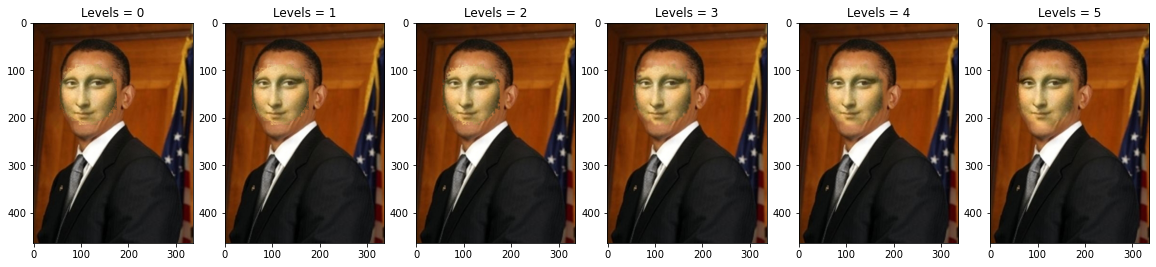

In [15]:
# ====== YOUR CODE: ======
monalisa_img = plt.imread(r'C:\Users\DHasin\Desktop\IMPR\hw5\images\monalisa.jpg')
obama_img = plt.imread(r'C:\Users\DHasin\Desktop\IMPR\hw5\images\obama.jpg')
mask_img = plt.imread(r'C:\Users\DHasin\Desktop\IMPR\hw5\images\monabama_mask.jpg')

monalisa_img = (monalisa_img/255).astype('float32')
obama_img = (obama_img/255).astype('float32')
mask_img = (mask_img/255).astype('float32')

binart_mask = np.zeros_like(mask_img)
binart_mask[mask_img!=0] = 1

inverse_mask = np.zeros_like(mask_img)
inverse_mask[mask_img==0] = 1

level_zero_img = monalisa_img*binart_mask + obama_img*inverse_mask

plt.figure(figsize=(20, 20))
plt.subplot(161)
plt.title('Levels = 0')
plt.imshow(level_zero_img)
    
for level in range(1, 6):
    gp_A = gaussian_pyramid(monalisa_img, level)
    gp_B = gaussian_pyramid(obama_img, level)
    gp_mask = gaussian_pyramid(binart_mask, level, True)

    blen = blend(laplacian_pyramid(gp_A), laplacian_pyramid(gp_B), gp_mask)
    recon = reconstruct(blen)
    plt.subplot(1, 6, level+1)
    plt.title(f'Levels = {level}')
    plt.imshow(recon[level-1].astype('float32'))
    
plt.show()
# ========================

6. What is the differences between the results of stitching the two images with different numbers of levels in the pyramids?



**Answer:**

We can see that the differences between the results of stitching the two images are in the blending of the edges between the images. When we are doing the blending in more iterations (more levels) we get better blending between the images (the edges of the mask are less notable).